In [4]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAPL-Feature.csv')
df.head()

,Open,High,Low,eps,pe,InRate,InfRate,Adj Close,Volume,Close
0,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.853355,535796800,0.999442
1,0.966518,0.987723,0.903460,0.188723,21.050533,2.796146,2.488276,0.781409,512377600,0.915179
2,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.792844,778321600,0.928571
3,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.724232,767972800,0.848214
4,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.758538,460734400,0.888393


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Feature Extraction

In [5]:
#independent feature 
X=df.iloc[:,:-1]
X

,Open,High,Low,eps,pe,InRate,InfRate,Adj Close,Volume
0,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.853355,535796800
1,0.966518,0.987723,0.903460,0.188723,21.050533,2.796146,2.488276,0.781409,512377600
2,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.792844,778321600
3,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.724232,767972800
4,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.758538,460734400
...,...,...,...,...,...,...,...,...,...
5531,177.089996,180.419998,177.070007,1.582562,10.786384,0.520334,1.977604,179.586868,74919600
5532,180.160004,181.330002,178.529999,1.582636,10.787788,0.520138,1.977684,178.551132,79144300
5533,179.330002,180.630005,178.139999,1.582711,10.789193,0.519943,1.977764,178.640778,62348900
5534,179.470001,180.570007,178.089996,1.582785,10.790599,0.519747,1.977845,177.465637,59773000


In [6]:
#dependent features
y=df['Close']
y

0         0.999442
1         0.915179
2         0.928571
3         0.848214
4         0.888393
           ...    
5531    180.330002
5532    179.289993
5533    179.380005
5534    178.199997
5535    177.570007
Name: Close, Length: 5536, dtype: float64

In [7]:
df.shape

(5536, 10)

In [14]:
df.corr()

,Open,High,Low,eps,pe,InRate,InfRate,Adj Close,Volume,Close
Open,1.000000,0.999934,0.999908,0.686741,-0.540784,-0.708434,-0.468215,0.999489,-0.414189,0.999839
High,0.999934,1.000000,0.999885,0.686259,-0.540307,-0.707958,-0.467708,0.999590,-0.413246,0.999916
Low,0.999908,0.999885,1.000000,0.687180,-0.541139,-0.708897,-0.468599,0.999557,-0.415576,0.999919
eps,0.686741,0.686259,0.687180,1.000000,-0.970636,-0.990473,-0.888649,0.671001,-0.334329,0.686660
pe,-0.540784,-0.540307,-0.541139,-0.970636,1.000000,0.949915,0.916812,-0.523391,0.204330,-0.540656
InRate,-0.708434,-0.707958,-0.708897,-0.990473,0.949915,1.000000,0.857959,-0.693497,0.355829,-0.708377
InfRate,-0.468215,-0.467708,-0.468599,-0.888649,0.916812,0.857959,1.000000,-0.451420,0.192201,-0.468084
Adj Close,0.999489,0.999590,0.999557,0.671001,-0.523391,-0.693497,-0.451420,1.000000,-0.410325,0.999659
Volume,-0.414189,-0.413246,-0.415576,-0.334329,0.204330,0.355829,0.192201,-0.410325,1.000000,-0.414408
Close,0.999839,0.999916,0.999919,0.686660,-0.540656,-0.708377,-0.468084,0.999659,-0.414408,1.000000


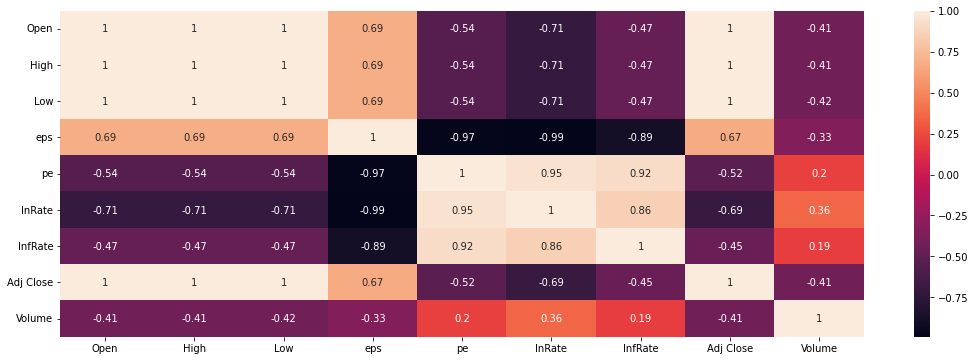

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(18,6))
sns.heatmap(df[top_features].corr(),annot=True)

In [ ]:
##Remove the correleated

In [16]:
threshold=0.975

In [17]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
correlation(df.iloc[:,:-1],threshold)


{'Adj Close', 'High', 'InRate', 'Low'}